In [2]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time

In [3]:
from dotenv import load_dotenv
import os

# Încarcă variabilele de mediu din fișierul .env
load_dotenv()

True

In [4]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

In [5]:

def getAllWordsFromCharArray(array):
    words = []
    for sentence in array:
        for word in sentence.split():
            words.append(word)
    return words

def getLettersFromWords(words):
    letters = []
    for word in words:
        for letter in word:
            letters.append(letter)
    return letters

def getWordsAndLettersFromImage(imagePath: str):
    img = open(imagePath, "rb")
    read_response = computervision_client.read_in_stream(
        image=img,
        mode="Printed",
        raw=True
    )
    operation_id = read_response.headers['Operation-Location'].split('/')[-1]
    while True:
        read_result = computervision_client.get_read_result(operation_id)
        if read_result.status not in ['notStarted', 'running']:
            break
        time.sleep(1)

    # Print the detected text, line by line
    result = []
    if read_result.status == OperationStatusCodes.succeeded:
        for text_result in read_result.analyze_result.read_results:
            for line in text_result.lines:
                result.append(line.text)
    
    words = getAllWordsFromCharArray(result)
    letters = getLettersFromWords(words)

    return words, letters

print(getWordsAndLettersFromImage("Images/example1.png"))


(['This', 'is', 'a', 'handwritten', 'example', 'Write', 'as', 'good', 'as', 'you', 'can.'], ['T', 'h', 'i', 's', 'i', 's', 'a', 'h', 'a', 'n', 'd', 'w', 'r', 'i', 't', 't', 'e', 'n', 'e', 'x', 'a', 'm', 'p', 'l', 'e', 'W', 'r', 'i', 't', 'e', 'a', 's', 'g', 'o', 'o', 'd', 'a', 's', 'y', 'o', 'u', 'c', 'a', 'n', '.'])


In [6]:
def hammingDistance(array1, array2):
    count = 0
    for el1, el2 in zip(array1, array2):
        if el1 != el2:
            count += 1

    return count

def levenshteinDistance(array1, array2):
    if len(array2) == 0:
        return len(array1)
    if len(array1) == 0:
        return len(array2)
    if array1[0] == array2[0]:
        return levenshteinDistance(array1[:-1],array2[:-1])
    return 1 + min([levenshteinDistance(array1[:-1],array2),levenshteinDistance(array1,array2[:-1]),levenshteinDistance(array1[:-1],array2[:-1])])

def  longestCommonSubsequence(array1, array2):
    if len(array1) == 0 or len(array2) == 0:
        return 0
    if array1[-1] == array2[-1]:
        return 1 + longestCommonSubsequence(array1[:-1],array2[:-1])
    return max(longestCommonSubsequence(array1,array2[:-1]),longestCommonSubsequence(array1[:-1],array2))

In [7]:
from Levenshtein import distance as lev

imagePath = "ex3.jpg"
groundTruthWords = ["Pisica","neagra","miauna","in","fata","usii"]
groundTruthLetters = getLettersFromWords(groundTruthWords)
wordsGoodImage,lettersGoodImage = getWordsAndLettersFromImage("Images/GoodImages/"+imagePath)
wordsBadImage,lettersBadImage = getWordsAndLettersFromImage("Images/BadImages/"+imagePath)

In [8]:
imagePath = "ex3.jpg"
groundTruthWords = ["Pisica","neagra","miauna","in","fata","usii"]
groundTruthLetters = getLettersFromWords(groundTruthWords)
wordsGoodImage,lettersGoodImage = getWordsAndLettersFromImage("Images/GoodImages/"+imagePath)
wordsBadImage,lettersBadImage = getWordsAndLettersFromImage("Images/BadImages/"+imagePath)
# print("GoodImages/"+imagePath)
# print(wordsGoodImage)
# print("Words")
# print("Hamming: {} out of {} words".format(len(groundTruthWords) - hammingDistance(groundTruthWords,wordsGoodImage), len(groundTruthWords)))
# print("Levensthein: {} out of {} words".format(len(groundTruthWords) - levenshteinDistance(groundTruthWords,wordsGoodImage), len(groundTruthWords)))
# print("Longest Common Subsequence: {}".format(longestCommonSubsequence(groundTruthWords,wordsGoodImage)))
# print("Letters")
# print("Hamming: {} out of {} letters".format(len(groundTruthLetters) - hammingDistance(groundTruthLetters,lettersGoodImage), len(groundTruthLetters)))
# print("Levensthein: {} out of {} letters".format(len(groundTruthLetters) - levenshteinDistance(groundTruthLetters,lettersGoodImage), len(groundTruthLetters)))
# print("Longest Common Subsequence: {}".format(longestCommonSubsequence(groundTruthLetters,lettersGoodImage)))
print()
print("BadImages/"+imagePath)
print(wordsBadImage)
print("Words")
print("Hamming: {} out of {} words".format(len(groundTruthWords) - hammingDistance(groundTruthWords,wordsBadImage), len(groundTruthWords)))
print("Levensthein: {} out of {} words".format(len(groundTruthWords) - lev(groundTruthWords,wordsBadImage), len(groundTruthWords)))
print("Longest Common Subsequence: {}".format(longestCommonSubsequence(groundTruthWords,wordsBadImage)))
print("Letters")
print("Hamming: {} out of {} letters".format(len(groundTruthLetters) - hammingDistance(groundTruthLetters,lettersBadImage), len(groundTruthLetters)))
print("Levensthein: {} out of {} letters".format(len(groundTruthLetters) - lev(groundTruthLetters,lettersBadImage), len(groundTruthLetters)))
# print("Longest Common Subsequence: {}".format(longestCommonSubsequence(groundTruthLetters,lettersGoodImage)))
print()
print()


BadImages/ex3.jpg
['Nice', 'meagra', 'maisuma', 'miauma', 'in', 'fata']
Words
Hamming: 0 out of 6 words
Levensthein: 1 out of 6 words
Longest Common Subsequence: 2
Letters
Hamming: 3 out of 28 letters
Levensthein: 11 out of 28 letters




In [11]:
groundTruthPoints = [((800,1500),(1110,1670)),((1200,1540),(1480,1650)),((770,1750),(1210,1870))]
def FindPoints(x1, y1, x2, y2, 
               x3, y3, x4, y4):

    x5 = max(x1, x3)
    y5 =max(y1, y3)
 
    x6 = min(x2, x4)
    y6 = min(y2, y4)

    return ((x5,y5),(x6,y6))

def Aria(pereche):
    upLeft, downRight = pereche
    return (downRight[0] - upLeft[0])*( downRight[1] - upLeft[1])

In [12]:
def probabilitateGeometrica(pereche1, pereche2):
    p11,p12 = pereche1
    p21,p22 = pereche2

    interUpLeft,interDownRight = FindPoints(p11[0],p11[1],p12[0],p12[1],p21[0],p21[1],p22[0],p22[1])
    return Aria((interUpLeft,interDownRight)) / Aria(pereche1)

def probabilitate(groundTruth,coords):
    p = 1
    for i in range(len(groundTruth)):
        p = p * probabilitateGeometrica(groundTruth[i],coords[i])
    return p

In [13]:
def framesEdges(imagePath):
    img = open(imagePath,"rb")

    # Get ID from returned headers
    read_response = computervision_client.read_in_stream(
            image=img,
            mode="Printed",
            raw=True
        )
    operation_id = read_response.headers['Operation-Location'].split('/')[-1]
    while True:
        read_result = computervision_client.get_read_result(operation_id)
        if read_result.status not in ['notStarted', 'running']:
            break
        time.sleep(1)

    frames = []

    # Get data
    if read_result.status == OperationStatusCodes.succeeded:
        for line in read_result.analyze_result.read_results[0].lines:
            for word in line.words:
                coords = word.bounding_box
                upLeft = (coords[0],coords[1])
                downRight = (coords[4],coords[5])
                frames.append((upLeft,downRight))

    return frames
        

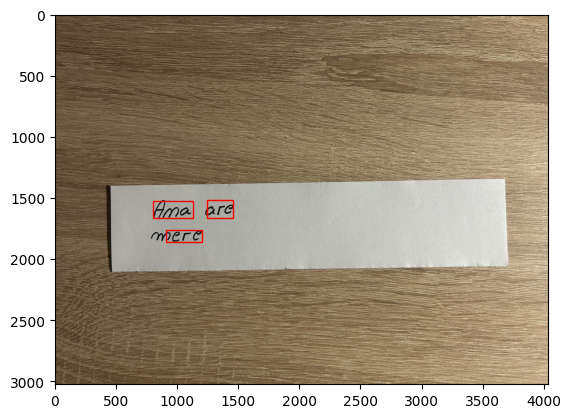

0.33374235056926


In [14]:
from PIL import Image, ImageOps
from PIL import ImageFilter
import matplotlib.pyplot as plt
import matplotlib.patches as patches

imagePath = "Images/GoodImages/ex1.jpg"
image = Image.open(imagePath)

fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

frames = framesEdges(imagePath)
# Create a Rectangle patch
for frame in frames:
    upLeft, downRight = frame
    rect = patches.Rectangle(upLeft, downRight[0]-upLeft[0], downRight[1]-upLeft[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

print(probabilitate(groundTruthPoints,frames))

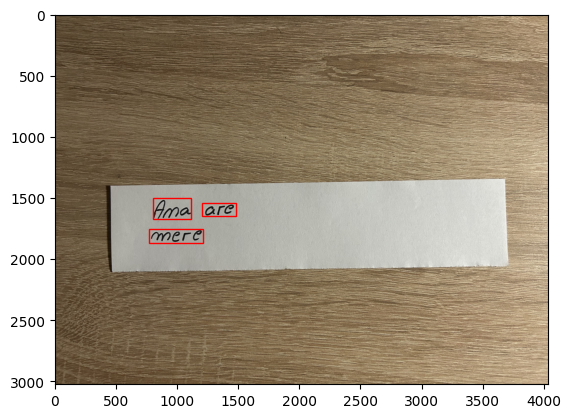

In [35]:
from PIL import Image, ImageOps
from PIL import ImageFilter
import matplotlib.pyplot as plt
import matplotlib.patches as patches

imagePath = "Images/GoodImages/ex1.jpg"
image = Image.open(imagePath)

fig, ax = plt.subplots()



print()

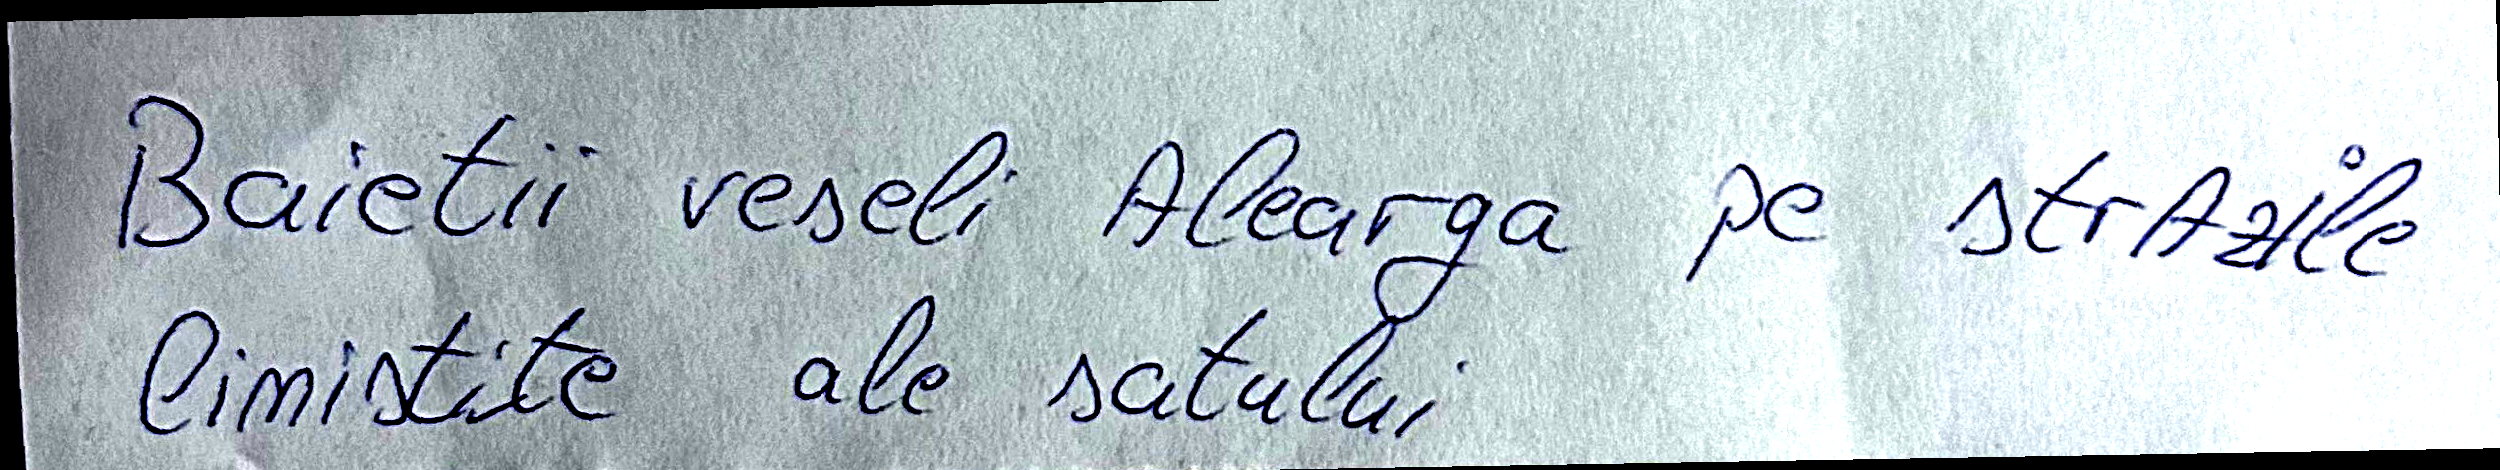

In [268]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter

# Specificați calea către fișierul imagine
image_path = 'Images/GoodImages/ex2.jpg'

# Încărcați imaginea folosind PIL (Python Imaging Library)
image = Image.open(image_path)
image = image.crop((200,1200, 2700,1670))

enhancer = ImageEnhance.Contrast(image)

# Specificați factorul de îmbunătățire a contrastului (1.0 este fără modificare)
contrast_factor = 3

# Aplicați îmbunătățirea contrastului
image = enhancer.enhance(contrast_factor)


enhancer = ImageEnhance.Brightness(image)

# Specificați factorul de îmbunătățire a luminozității (0.5 pentru a reduce luminozitatea)
brightness_factor = 1
image = enhancer.enhance(brightness_factor)

image = image.rotate(1)

image.show()

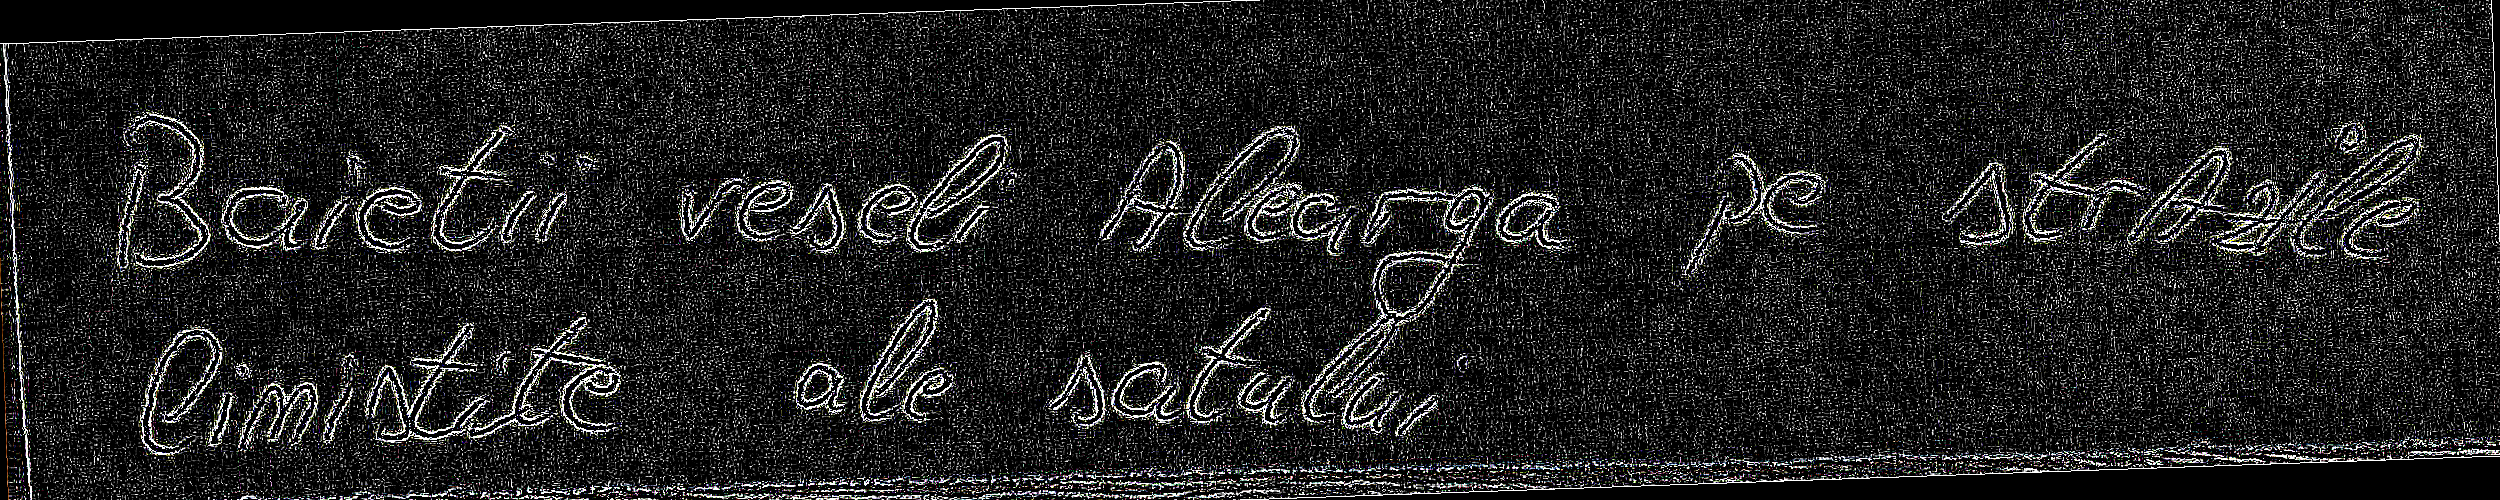

In [270]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter

# Specificați calea către fișierul imagine
image_path = 'Images/GoodImages/ex2.jpg'

# Încărcați imaginea folosind PIL (Python Imaging Library)
image = Image.open(image_path)
image = image.crop((200,1200, 2700,1700))

image = image.filter(ImageFilter.FIND_EDGES)
# Crearea unui obiect ImageEnhance pentru contrast

enhancer = ImageEnhance.Brightness(image)

# Specificați factorul de îmbunătățire a luminozității (0.5 pentru a reduce luminozitatea)
brightness_factor = 2
image = enhancer.enhance(brightness_factor)

enhancer = ImageEnhance.Contrast(image)

# Specificați factorul de îmbunătățire a contrastului (1.0 este fără modificare)
contrast_factor = 3

# Aplicați îmbunătățirea contrastului
image = enhancer.enhance(contrast_factor)
image = image.rotate(2)



image.show()

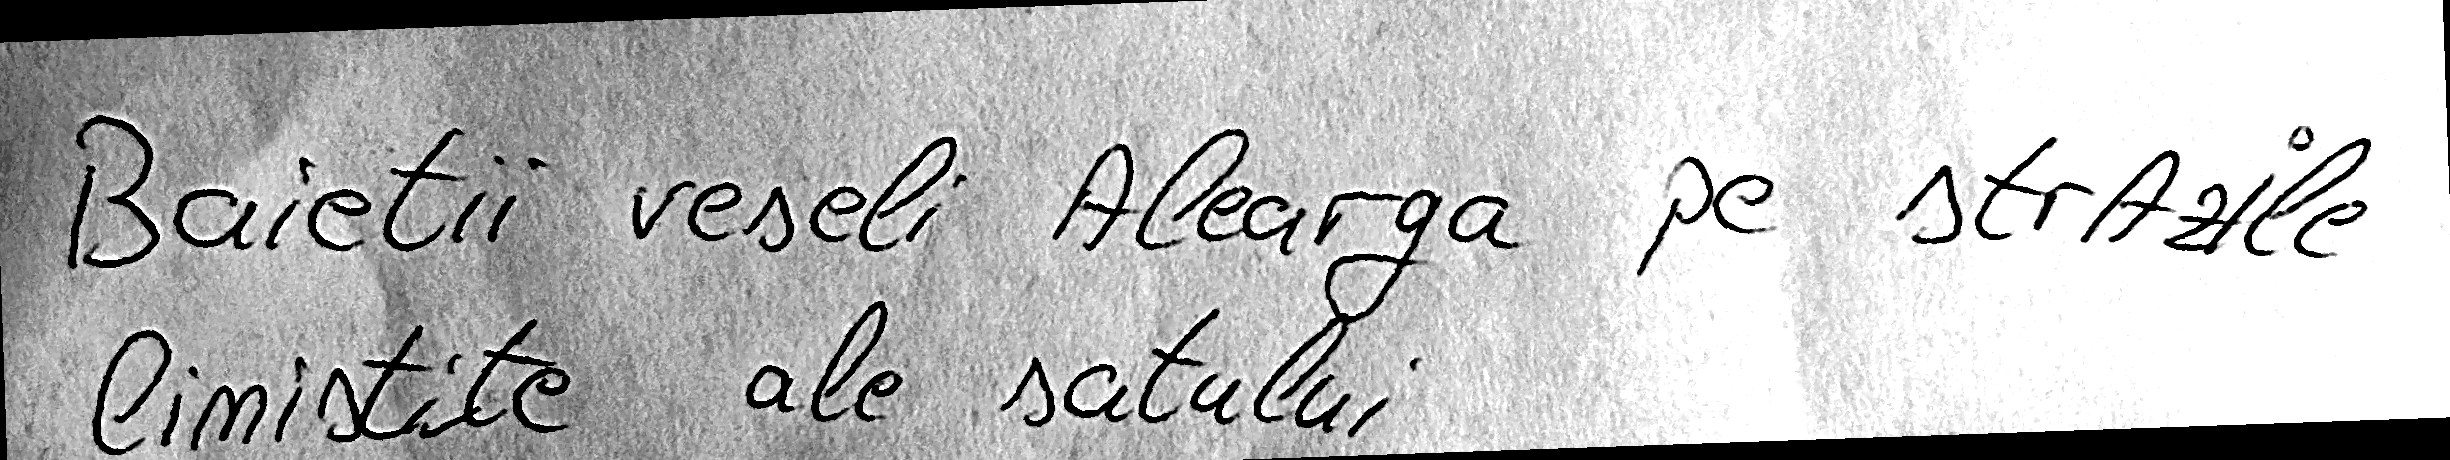

In [303]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter

# Specificați calea către fișierul imagine
image_path = 'Images/GoodImages/ex2.jpg'

# Încărcați imaginea folosind PIL (Python Imaging Library)
image = Image.open(image_path)
image = image.crop((250,1200, 2700,1660))

image = ImageOps.grayscale(image)
image = ImageOps.autocontrast(image)

enhancer = ImageEnhance.Contrast(image)

contrast_factor = 4

# Aplicați îmbunătățirea contrastului
image = enhancer.enhance(contrast_factor)

image = image.filter(ImageFilter.ModeFilter)

image = image.rotate(2)

image.show()

In [304]:
print(getWordsAndLettersFromImage('Images/GoodImages/ex2.jpg')[0])
print(getWordsAndLettersFromImage('../output.png')[0])
print(getWordsAndLettersFromImage('../output2.png')[0])
print(getWordsAndLettersFromImage('../output3.png')[0])
print(getWordsAndLettersFromImage('../output4.png')[0])

['Baietii', 'veseli', 'Alcarga', 'pe', 'strAzile', 'Cinistite', 'ale', 'satulur']
['Baietii', 'veseli', 'Alcarga', 'pe', 'strAzile', 'limistite', 'ale', 'satului']
['Baictu', 'vesel', 'Alcarga', 'AtAvle', 'Cimistico', 'ale', 'salat']
['Baietii', 'veseli', 'Alcarga', 'pe', 'strAzile', 'linistite', 'ale', 'satului']
['Baietii', 'veseli', 'Alcarga', 'pe', 'strAzile', 'limistate', 'ale', 'satului']


In [4]:
import cv2
import pytesseract
# Load image
img = cv2.imread("Images/test2.jpeg")
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply threshold to convert to binary image
threshold_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# Pass the image through pytesseract
text = pytesseract.image_to_string(threshold_img, config="--psm 6")

print(text)

——e )
Y on fe seltWuQ
HCC Me
TEMELOR ha. |
LAGORA tearele ole
Trti li > $ /
eee a Be Bi a *°
: a
cn i |
go ee ae 3



In [29]:
import cv2
import pytesseract
# Load image
img = cv2.imread("Images/test2.jpeg")
size = 450,400
img = cv2.resize(img,size)
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply threshold to convert to binary image
threshold_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# Pass the image through pytesseract
text = pytesseract.image_to_string(threshold_img,config="--psm 6")
print(text)

Succes in Ae Beltran
CEMELOR. La.
4AEPKA toarele "ole
Inti bg tLe call L
aa Bi
pe aa

